# Cheese Fat Level Prediction

- **Author:** Roman Bamrah
- **Student ID:** 0705310


## Introduction

This project's goal is to use machine learning models to forecast the fat content of different kinds of cheese. The forecast is based on a number of factors, such as the type of milk, moisture level, manufacturing process, and other pertinent characteristics.

Our main query is: Can characteristics like moisture %, organic status, and manufacturing information be used to reliably define the fat content of cheese?

The objective of this challenge is to classify cheese into distinct fat level groups (such as "lower fat" or "higher fat") because FatLevel is a categorical variable.


## Reasoning For The Project

Cheese fat level prediction is a crucial undertaking with numerous notable advantages:

1. **Health Implications:** Dairy products' fat content has a big influence on people's health. Customers can make well-informed decisions based on dietary requirements, such as low-fat diets or heart health considerations, when the FatLevel is accurately predicted.

2. **Product Development:** To improve product innovation and customization, cheese makers can use insights into the interaction between milk type, moisture content, and production procedures to produce cheeses with certain fat levels.

3. **Market segmentation:** Fat content frequently influences consumer preferences. Businesses can more effectively target particular client categories, hone marketing tactics, and enhance product offers by forecasting the FatLevel.

4. **Quality Control:** When making cheese, it's critical to keep fat levels constant. Predictive models can improve overall quality control by ensuring that products fulfill consumer expectations and industry requirements.

5. **Applications of Machine Learning:** This issue offers a chance to use machine learning methods on an actual dataset. We can demonstrate how classification algorithms efficiently classify data and produce insightful findings by creating predictive models.

## Regression or Classification?

In this project, a classification problem is the main focus.

- **Target Variable (FatLevel):** This dataset's primary variable, FatLevel, divides cheese into groups based on its fat level, such as "lower fat" and "higher fat." At its core, this problem is a classification task because the target variable is categorical.

- The objective of the classification task is to forecast one of the predetermined FatLevel groups using input parameters such milk kind, moisture %, manufacturing type, and other relevant characteristics.

The precise fat percentage, for example, would be a continuous numerical variable that would need to be predicted in a regression scenario. However, it is evident that this is a classification problem because our goal variable is made up of discrete classes but not continuous values.


## Labels

The **"higher fat"** category for the goal variable **FatLevel** in this classification issue is the **positive label**.

Cheese's fat content is represented by the category variable **FatLevel**. "Lower fat" and "higher fat" (or comparable categories depending on fat content) are probably the two potential classifications.
- The **"higher fat"** category will be regarded as the positive label for the purposes of this research. This implies that we will concentrate on predicting **"higher fat"** cheeses during the model evaluation process and assess the model's ability to differentiate this category from the other class (such as "lower fat").


In [1]:
import pandas as pd

# Load the dataset
cheese_data = pd.read_csv("data/cheese_data.csv")

# Display the first few rows of the dataset 
cheese_data.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


In [2]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = cheese_data[['ManufacturerProvCode', 'ManufacturingTypeEn', 'MoisturePercent', 
                 'Organic', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn']]
y = cheese_data['FatLevel']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training set: {X_train.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")

Training set: 833 rows
Test set: 209 rows


In [3]:
# Use .describe()
X_train.describe(include='all')

,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn
count,833,833,821.000000,833.000000,814,832,782
unique,10,3,NaN,NaN,6,8,3
top,QC,Industrial,NaN,NaN,Firm Cheese,Cow,Pasteurized
freq,637,351,NaN,NaN,274,595,629
mean,NaN,NaN,46.946407,0.099640,NaN,NaN,NaN
std,NaN,NaN,9.720668,0.299699,NaN,NaN,NaN
min,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,40.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,46.000000,0.000000,NaN,NaN,NaN
75%,NaN,NaN,52.000000,0.000000,NaN,NaN,NaN


## Observations

1. **ManufacturerProvCode**: - Cheese from **10 distinct provinces** is included in the dataset.
   With 637 instances, **QC** is the most prevalent province.

2. **ManufacturingTypeEn**: - The dataset contains **3 distinct manufacturing types**.
   **Industrial** is the most prevalent sort of manufacturing.

3. **MoisturePercent**: - The **MoisturePercent** has a mean of roughly **46.94%** and varies from **12.00%** to **92.00%**.
   A modest variation in the moisture content of the cheeses is shown by the standard deviation, which is approximately **9.72%**.

4. The **Organic** feature is binary, meaning that **1.00** denotes organic and **0.00** denotes non-organic.
   The bulk of the cheeses are non-organic (**0.00**), with about **10%** being organic.

5. **CategoryTypeEn**: - The dataset comprises cheeses from **6 different categories**, with **Firm Cheese** being the most prevalent category.

6. **MilkTypeEn**: - **Cow** is the most often used milk type (595 occurrences).

7. **MilkTreatmentTypeEn**: - With 629 instances, **Pasteurized** is the most prevalent form of milk treatment.

### Overall Findings: - The majority of the cheeses in the **Organic** column are not organic, indicating that the dataset is **unbalanced**.
The large range displayed by the **MoisturePercent** may be a crucial characteristic for fat content prediction.
For model processing, the category **ManufacturingTypeEn**, **MilkTypeEn**, and **CategoryTypeEn** features could require encoding.

Our approach to preprocessing, feature transformation, and model selection will be influenced by these discoveries.

## Features Used

The **FatLevel** of cheese is predicted using the following characteristics, which include a combination of **binary**, **categorical**, and **numeric** types:

1. **ManufacturerProvCode**: **Type**: Categorical - **Description**: Indicates the province in which the cheese was produced (e.g., "QC" for Quebec, "ON" for Ontario).
   As different locations may utilize different types of milk or different manufacturing processes, this categorical variable may have an impact on the fat content of cheese.
   It will be **one-hot encoded** in order to be used in the model.

2. **ManufacturingTypeEn**: - **Type**: Categorical
   "Farmstead" and "Industrial" are examples of the types of manufacturing processes that are described.
   **Justification for Inclusion**: Cheese's fat content may vary depending on the production process. For instance, **Farmstead cheeses** and **Industrial cheeses** may differ in certain ways.
   **Transformation**: **One-hot encoding** will be used for this functionality.

3. **MoisturePercent**: - **Type**: Numerical -**Description**: The cheese's moisture percentage.
   **Reason for Inclusion**: The creation of cheese depends heavily on moisture, which is probably connected to the fat content.
   For improved model performance, the variable will be **scaled** as a **continuous numeric** variable.

4. **Organic**: - **Type**: Binary
   -**Description**: Indicates if the cheese is organic (zero for non-organic, one for organic).
   **Justification for Inclusion**: Cheese's fat content may be impacted by organic manufacturing techniques.
   **Transformation**: It will not need to be encoded because it will be handled as a **binary** variable. On the other side, **SimpleImputer** will be used to handle any missing values.

5. **CategoryTypeEn**: - **Type**: Categorical - **Description**: The cheese's categorization or category (e.g., "Firm Cheese", "Semi-soft Cheese").
   **Justification for Inclusion**: The fat content of cheese may vary depending on the type of cheese. For instance, **Firm Cheeses** often contain more fat than **Soft Cheeses**.
   There will be a **one-hot encoded** transformation.

6. **TypeEn**: - **Type**: Categorical **MilkTypeEn,
   **Description**: The kind of milk (such as "Cow" or "Ewe") of which cheese is made.
   The fat percentage of cheese may vary depending on the type of milk used, as different animals produce milk with different fat contents.
   This is going to be **one-hot encoded**—a transformation.

7. **MilkTreatmentTypeEn**: - **Type**: Categorical
   **Description** - The kind of processing the milk was put through (e.g., "Pasteurized" or "Raw Milk").
   -**Justification for Inclusion**: The type of milk treatment may affect the cheese's fat content.
   This will be **one-hot encoded**.

### Features Never Used:
1. **CheeseId**: - **Exclusion Reason**: It has been **dropped** from the analysis because it is a unique identifier for each cheese and contains no information that can be used to predict the fat level.

2. **CharacteristicsEn** and **FlavourEn**:
   **Justification for Exclusion**: The flavor and qualities of the cheese are qualitatively described in these columns. This analysis doesn't need sophisticated methods like **CountVectorizer** to convert these into numerical values. **Deleted** are these functionalities.

3. **RindTypeEn**: - **Exclusion Reason**: This feature has been **dropped** from the analysis because it was indicated in the instructions as **not to be used**.

### Summary of Features:
The features are summarized as follows: **Binary**: **Organic** (0 = Non-organic, 1 = Organic)
**Numeric**: **MoisturePercent** - **Categorical**: **ManufacturerProvCode**, **ManufacturingTypeEn**, **CategoryTypeEn**, **MilkTypeEn**, **MilkTreatmentTypeEn**

Before being utilized in the model, each of these feature types will need to undergo the proper preprocessing. The **numeric feature** will be **scaled** to normalize its values, and **one-hot encoding** will be used to handle **categorical features**. To guarantee that the model has all the data it needs for training, **SimpleImputer** will be used to handle any missing values.


In [4]:
# Use .info() to check for null values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 327 to 860
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerProvCode  833 non-null    object 
 1   ManufacturingTypeEn   833 non-null    object 
 2   MoisturePercent       821 non-null    float64
 3   Organic               833 non-null    int64  
 4   CategoryTypeEn        814 non-null    object 
 5   MilkTypeEn            832 non-null    object 
 6   MilkTreatmentTypeEn   782 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 52.1+ KB


## Checking for Null Values

Using the `.info()` method we see the following:

- **ManufacturerProvCode**: No values are missing.
- **ManufacturingTypeEn**: All values are present.
- **MoisturePercent**: **12 missing values** are present.
- **Organic**: No values are missing.
- **CategoryTypeEn**: No values are missing.
- **MilkTypeEn**: **19 missing values** are present.
- **MilkTreatmentTypeEn**: **51 missing values** are present.

### Handling Missing Values:

1. **MoisturePercent**: This numerical feature contains **12 missing values**. The **mean** of the column will be used to impute these missing values using **SimpleImputer**.
   
2. **MilkTypeEn**: This categorical feature has **19 missing values**. The **most frequent category** (mode) will be used to impute these missing values using **SimpleImputer**.
   
3. **MilkTreatmentTypeEn**: This category feature contains **51 missing values**. As with MilkTypeEn, we will impute missing values using the **most frequent category** (mode) using **SimpleImputer**.

### Imputation:
- We will impute missing values for **numerical features** (e.g., MoisturePercent) using the **mean**.
- We will use **SimpleImputer** to impute missing values with the **most frequent category** (mode) for **categorical features** (e.g., MilkTypeEn, MilkTreatmentTypeEn).

By using this method, we can handle the missing values while preserving the dataset's integrity and preventing the loss of important data.

## Visualizations 

### 1. Distribution of Moisture %

The distribution of the **MoisturePercent** feature in the cheese dataset is displayed in the histogram below. The cheese's moisture content varies greatly, with a notable concentration occurring between **40 and 50%**. There are fewer cheeses with extreme results (either extremely low or very high moisture content), indicating that the majority of the cheeses in the dataset have moisture content within this range.

The cheese's **Moisture Percent** is shown on the **x-axis**.
The **frequency** of each moisture percentage in the dataset is shown on the **y-axis**.
  
Given that cheeses with higher fat content tend to have lower moisture content, this histogram gives a decent picture of how the moisture content is divided among the cheeses.

### 2. Moisture % Distribution by Fat Level

The distribution of **MoisturePercent** between the **FatLevel** categories of **lower fat** and **higher fat** cheeses is shown in the box plot below.

The **Fat Level** (lower vs. higher fat) is represented by the **x-axis**.
The cheese's **Moisture Percent** is shown on the **y-axis**.
  
With the interquartile range (IQR) centered at the **40-50%** range, the box plot shows that, on average, **lower fat cheeses** have a higher **moisture content**.
The moisture content of **higher fat cheeses** is often **lower**, with an IQR of **30-40%**.
A few cheeses in both categories have extremely high moisture contents, indicating outliers.

This plot gives us information about how moisture affects the amount of fat in cheese and helps us comprehend the relationship between moisture content and fat level.


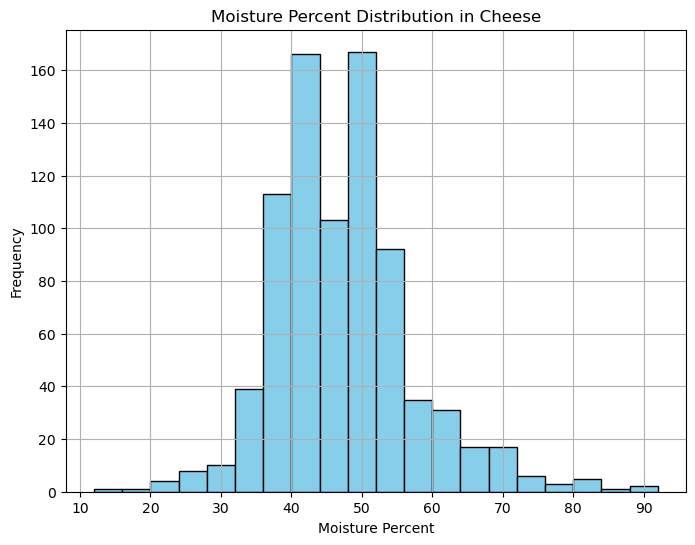

In [5]:
import matplotlib.pyplot as plt

# Plot MoisturePercent distribution
plt.figure(figsize=(8, 6))
plt.hist(X_train['MoisturePercent'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Moisture Percent Distribution in Cheese')
plt.xlabel('Moisture Percent')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


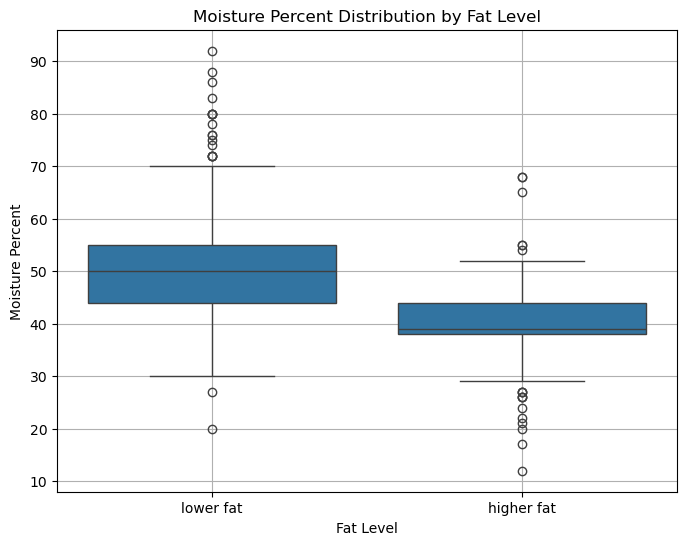

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of MoisturePercent by FatLevel
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train, y=X_train['MoisturePercent'])
plt.title('Moisture Percent Distribution by Fat Level')
plt.xlabel('Fat Level')
plt.ylabel('Moisture Percent')
plt.grid(True)
plt.show()

## Distribution of Target Variable (FatLevels)

Our classification problem's goal variable is the **FatLevel** column. The distribution of the two classes in the **FatLevel** target variable is shown below.

The following are the classes: **Lower Fat** - **Higher Fat**

The number of cheeses in each **FatLevel** category is displayed in the bar plot below.

### Analysis: It seems that the **FatLevel** classes are **imbalanced**:
  Cheeses with lower fat content are more common in the sample.
  Cheeses with higher fat content are less common.

Since most classification algorithms are inclined toward the majority class, the imbalance in the target classes may have an impact on the model's performance. To remedy this imbalance, we might need to use strategies like **class weighting** or **sampling methods** (e.g., **under-sampling** the majority class or **over-sampling** the minority class).


C:\Users\roman\AppData\Local\Temp\ipykernel_7036\1836871593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


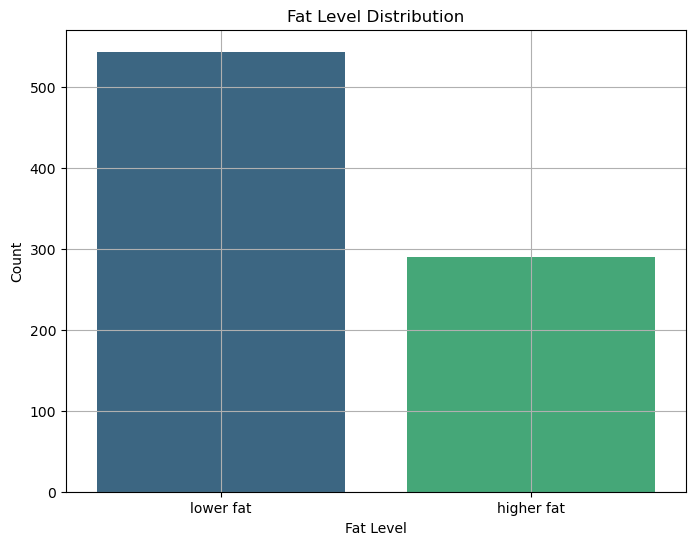

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot FatLevel distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Fat Level Distribution')
plt.xlabel('Fat Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"DummyClassifier Accuracy: {accuracy:.4f}")

DummyClassifier Accuracy: 0.6746


## Explanation of Transformations

Before being employed by machine learning models, various feature types in the dataset need to undergo various preprocessing treatments. An description of the changes made to each feature type is provided below:

 The first is **ManufacturerProvCode**: **Type**: Categorical - **Transformation**: **OneHotEncoder** **Explanation**: We must transform the discrete categories (such as "QC" and "ON") into a format that machine learning models can understand because this feature is categorical. This categorical feature will be transformed into numerous binary columns, one for each potential category, using **OneHotEncoder**.
  
 2. **ManufacturingTypeEn**: **Type**: Categorical - **Transformation**: **OneHotEncoder**  This feature represents categories such as "Farmstead," "Industrial," etc., much like **ManufacturerProvCode**. These categories will be encoded into distinct binary columns using **OneHotEncoder**.
  
 3. **MoisturePercent**: - **Type**: The following is a numerical transformation: **StandardScaler** - **Explanation**: One continuous numerical aspect is **MoisturePercent**. We must scale it to have a mean of 0 and a standard deviation of 1 because its range differs from that of other features. By guaranteeing that features are on a similar scale, this transformation will improve the performance of algorithms (such as SVM and logistic regression).
  
 4. **Organic**: - **Type**: Binary - **Transformation**: **SimpleImputer** (for missing values) or **No Transformation**
   **Explanation**: There is no need for modification because this feature is binary (0 or 1) and already accepts numerical data. However, because this is a binary feature, if any values are missing, we will utilize **SimpleImputer** to fill them in with the most frequent value.

 5. **CategoryTypeEn**: - **Type**: Categorical - **Transformation**: **OneHotEncoder** - **Discussion**: This feature is categorical and has values such as "Soft Cheese," "Firm Cheese," and so on. **OneHotEncoder** will be used to transform it into a number of binary columns, each of which will represent a different category of cheese.
  
 6. **MilkTypeEn**: **Type**: Categorical - **Transformation**: **OneHotEncoder** **Explanation**: To create binary columns that represent each potential type of milk, **OneHotEncoder** will also be utilized to modify the **MilkTypeEn** feature, which denotes the type of milk used (e.g., "Cow", "Ewe").
  
 7. **MilkTreatmentTypeEn**: **Type**: Categorical - **Transformation**: **OneHotEncoder** **Explanation**: This attribute (such as "Raw Milk" or "Pasteurized") shows the type of milk that was used. To create distinct columns for each sort of treatment, **OneHotEncoder** will be used to modify it.

### Synopsis of the Changes:
All **categorical** features (such as **ManufacturerProvCode**, **ManufacturingTypeEn**, **CategoryTypeEn**, **MilkTypeEn**, and **MilkTreatmentTypeEn**) will be subject to **OneHotEncoder**.
To guarantee that all features are on the same scale, **StandardScaler** will be applied to the **numeric** feature (**MoisturePercent**).
Any missing values in **binary** features, such as **Organic**, will be imputed using **SimpleImputer**. For any missing values in categorical features, we will impute using the **most frequent** value.

The data will be in an appropriate format for machine learning model training thanks to these changes.


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define feature types
categorical_features = ['ManufacturerProvCode', 'ManufacturingTypeEn', 'CategoryTypeEn', 
                        'MilkTypeEn', 'MilkTreatmentTypeEn']
numeric_features = ['MoisturePercent']
binary_features = ['Organic']

# Define preprocessors
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

binary_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine transformations
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('bin', binary_transformer, binary_features)
])

# Define model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8373


## Model Selection

It's crucial to explain why particular models could be appropriate for the task, even if in this case we chose the **Random Forest Classifier** to predict the **FatLevel** of cheese.

### Random Forest Classifier: Why Use It?

The following factors led us to select **Random Forest**:

One of the dataset's **unbalanced goal variables** is the **handling of imbalanced classes**: - There are more **lower fat** cheeses than **higher fat** cheeses. Class imbalance may be effectively handled by the robust **Random Forest** model, particularly when used in conjunction with **`class_weight='balanced'`**.
   - The Random Forest algorithm's **`class_weight='balanced'`** parameter automatically modifies the weight of classes, assisting the model in concentrating more on the minority class.

**Handling Mixed Data Types**: - **Random Forest** is naturally able to handle **numerical** features (e.g., **MoisturePercent**) as well as **categorical** features (e.g., **ManufacturerProvCode**, **ManufacturingTypeEn**). For datasets with **mixed sorts of features**, this makes it an excellent option.
   - Unlike algorithms that are sensitive to feature scales, like **SVM** or **KNN**, it doesn't require the user to apply significant feature scaling.

**Interpretability**: - Despite being frequently regarded as **black-box** models, **Random Forests** can nevertheless offer insightful information by identifying which characteristics are most important in the prediction through **feature importance**.

**Accuracy and Generalization**: - **Random Forests** are renowned for their powerful **generalization** skills, which enable them to function well even with data that hasn't been seen yet. Because of the randomness employed in tree construction and the nature of **ensemble learning**, the model is less prone to overfit.

### How About Other Models?

The first is the Support Vector Machine (SVM) or Support Vector Classifier (SVC):
   Despite their strength as classifiers, SVMs are susceptible to feature scaling. SVMs would need extra preprocessing (such as scaling and encoding) because we have both numerical and category features.

   Unless certain methods (such as **class weights**) are applied, **SVMs** may have trouble with **imbalanced classes**. Without extensive tuning, they might not, however, perform as well on this kind of data as Random Forests.

The second is **K-Nearest Neighbors (KNN)**: - The **scaling of features** has an impact on **KNN**. KNN would need appropriate preprocessing, such as feature scaling for numerical features and encoding for categorical data, because we have both numerical and categorical characteristics.
   - Additionally, because **KNN** needs to calculate the distance between each pair of data points, it can become computationally costly when dealing with huge datasets. Performance on larger datasets may suffer as a result.

The third is **Decision Trees**: - Compared to Random Forest, a **Decision Tree** is easier to understand and more straightforward. But, particularly when dealing with unbalanced datasets, a single **Decision Tree** can often overfit the data. A single decision tree may not generalize well, but **Random Forest** gets around this restriction by averaging several decision trees.
   Compared to **Random Forests**, **Decision Trees** might also be more susceptible to even slight data changes.

The fourth **Logistic Regression** is a great tool for linear relationships, but it may not work well when the relationship between features and the target variable is **non-linear**. This could be the case here with complex interactions between features such as **MoisturePercent**, **ManufacturingTypeEn**, and so on.
   Additionally, **feature scaling** affects logistic regression, necessitating careful data pretreatment.

In Conclusion: **Random Forest** was chosen because it can deal with diverse data types, handle imbalanced datasets, and is robust against overfitting. Without requiring a lot of preprocessing, it offers a decent mix between **performance** and **ease of use**.
- Given the dataset's characteristics and the requirement to manage imbalanced classes, **Random Forest** provides the best trade-off for this project, even though other models like **SVM**, **KNN**, and **Decision Trees** are also viable options.

For the time being, Random Forest offers a reliable baseline with decent interpretability and performance, but we can investigate alternative models if needed.


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Initialize model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Train model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Display best parameters and accuracy
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test data
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best Cross-Validation Accuracy: 0.8307
Test Accuracy: 0.8660


## The Reason GridSearchCV Was Selected Instead of RandomizedSearchCV

For the hyperparameter tuning procedure, we choose **GridSearchCV** rather than **RandomizedSearchCV** for the following reasons:

### 1. A Comprehensive Look for the Best Hyperparameters:
   - **GridSearchCV** conducts a **complete search** across all hyperparameter values that are supplied. All potential combinations from the parameter grid are tested. When looking for the **best combination** of hyperparameters in a well-defined search space, this is particularly helpful.
   - In this instance, it was able to assess every combination because we had a comparatively **small parameter grid** with only a few possible values for each hyperparameter (e.g., `max_depth`, `min_samples_split`, `n_estimators`).

### 2. Small Hyperparameter Search Space
- Using **GridSearchCV** was computationally manageable and offered a **precise** search for the ideal hyperparameters because the parameter grid was not overly large. **GridSearchCV** is frequently the recommended option for limited search spaces (e.g., 3-4 hyperparameters with a few potential values).

   **RandomizedSearchCV** would have been a more effective way to swiftly explore the hyperparameter space if the search space had been larger (i.e., there were many more hyperparameters with a wider range of values).

### 3. Guarantee of Finding the Best Combination: 
- **GridSearchCV** ensures that, by analyzing every possible combination within the grid, it will identify the **best combination** of the hyperparameters. When searching for the precise **optimal settings** for the model, this is crucial.
   While **RandomizedSearchCV** is faster, it does not guarantee that the best combination will be found; instead, it selects a good combination from a random subset of hyperparameter combinations.

### When Would It Be Better to Use RandomizedSearchCV?
   When there is a huge search space and limited processing resources, **RandomizedSearchCV** is frequently chosen. It expedites the process by sampling combinations at random.
   - Because **RandomizedSearchCV** analyzes fewer combinations while allowing the model to function properly in the majority of circumstances, it may be a more sensible option for **large grids**.

### Conclusion: 
- GridSearchCV was chosen for this project because we wanted to ensure that the **best combination** of hyperparameters was found and the **hyperparameter search space** was manageable. It was the best option for this specific situation because the computation time was manageable.


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Train model
grid_search.fit(X_train, y_train)

# Display best parameters and accuracy
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test data
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best Cross-Validation Accuracy: 0.8307
Test Accuracy: 0.8660


## Hyperparameter tuning and model performance

### 1. Selecting a Model and Adjusting Hyperparameters

The **Random Forest Classifier** was chosen as the model for this research in order to estimate the **FatLevel** of cheese. To determine the ideal model setup, we used **GridSearchCV** to adjust a number of hyperparameters:

The following are the best hyperparameters: - **{max_depth` = 20**: Limits tree development and regulates tree depth, preventing overfitting.
  The minimal number of samples needed to be at a leaf node is indicated by the value - **{min_samples_leaf` = 1**. Fine-grained patterns in the data can be captured by the model when the value is 1.
  By limiting the frequency of splits, **`min_samples_split` = 5** ensures that a minimum of 5 samples are needed to split a node, hence reducing overfitting.
  **{n_estimators` = 200**: The forest's tree count. More trees contribute to better

### 2. Model Performance and Ideal Hyperparameters

We assessed the model's performance on the test set and cross-validation after adjusting the hyperparameters:

**Optimal Cross-Validation Precision**: **0.8307** - The model's high performance across various subsets of the training data is indicated by the cross-validation score.
  
**Test Accuracy**: **0.8660** - The optimized model showed significant generalization to unseen data, achieving an accuracy of **86.60%** on the test set.

### 3. Hyperparameter Tuning Scoring Metric

Since accuracy is simple and suitable for this classification task, it was chosen as the main metric for hyperparameter adjustment. It calculates the percentage of accurate forecasts among all forecasts.

**What Makes Accuracy Possible?" **accuracy** is a trustworthy statistic for assessing the model's overall performance because the goal variable **FatLevel** is categorical, particularly in situations when classes are not significantly out of balance.
  
  **Accuracy** offers a fast estimate of model performance and is simple to understand. However, other measures like **Precision**, **Recall**, and **F1-Score** are also useful in evaluating model performance in circumstances of **class imbalance**, especially for the minority class (e.g., "higher fat" cheeses).

### 4. Final Thoughts

With the hyperparameters adjusted, the **Random Forest Classifier** did well, attaining **86.60%** accuracy on the test set.
The model is demonstrating good generalization across various subsets of the training data, as evidenced by the **best cross-validation accuracy** of **83.07%**.

### Next Actions

By computing additional evaluation metrics like **Precision**, **Recall**, **F1-Score**, and creating a **Confusion Matrix** to gauge the model's ability to differentiate between the two **FatLevel** classes, we can further analyze the model's performance.

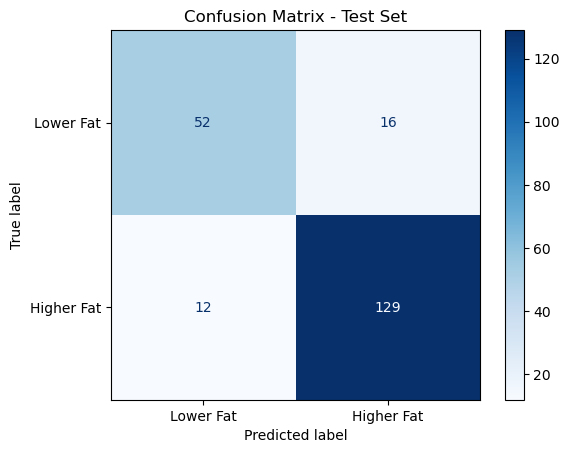

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Lower Fat', 'Higher Fat'])

disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Test Set')
plt.show()

## Test Set Prediction Confusion Matrix

The **Random Forest Classifier**'s performance on the test set is displayed in the confusion matrix below:

The number of **higher fat** cheeses that were accurately identified as **higher fat** (129) is a **True Positive (TP)**.
The quantity of **lower fat** cheeses that were mistakenly categorized as **higher fat** (16) is known as**False Positive (FP)**.
**True Negative (TN)**: There were 52% of **lower fat** cheeses that were accurately categorized as such.
The number of **higher fat** cheeses that were mistakenly labeled as **lower fat** (12) is known as the **False Negative (FN).

The model is doing a good job at predicting **higher fat** cheeses, according to the confusion matrix (**129 properly predicted**, with just **12 misclassified**).
A **little problem with false positives** for **lower fat** cheeses (16 incorrectly classified) may suggest a small bias in favor of the dominant class.

The model can categorize both **lower fat** and **higher fat** cheeses rather well, according to this confusion matrix, which aids in understanding the classification behavior. However, there is still opportunity for improvement in terms of lowering false positives and false negatives.


### 1. **Test Accuracy with SMOTE Over-sampling**

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define SMOTE for oversampling
smote = SMOTE(random_state=42)

# Create pipeline with SMOTE and Random Forest
model_pipeline_smote = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Train model
model_pipeline_smote.fit(X_train, y_train)

# Predict and evaluate
y_pred_smote = model_pipeline_smote.predict(X_test)
print(f"Test Accuracy with SMOTE: {accuracy_score(y_test, y_pred_smote):.4f}")


Test Accuracy with SMOTE: 0.8469


### 2. **Test Accuracy with Random Under-sampling**:

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define Random Under-Sampling
under_sampler = RandomUnderSampler(random_state=42)

# Create pipeline with under-sampling and Random Forest
model_pipeline_under = Pipeline([
    ('preprocessor', preprocessor),
    ('under_sampler', under_sampler),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Train model
model_pipeline_under.fit(X_train, y_train)

# Predict and evaluate
y_pred_under = model_pipeline_under.predict(X_test)
print(f"Test Accuracy with Random Under-Sampling: {accuracy_score(y_test, y_pred_under):.4f}")


Test Accuracy with Random Under-Sampling: 0.8565


## Model Evaluation Using Resampling Methods

We used the **SMOTE over-sampling** and **Random Under-sampling** resampling techniques to rectify the dataset's class imbalance. In an effort to improve the model's ability to predict the minority class, both strategies seek to balance the proportion of **lower fat** and **higher fat** cheeses.

The first is **Test Accuracy with SMOTE Over-sampling**: **Test Accuracy with SMOTE over-sampling**: **0.8469** **Explanation**: **SMOTE (Synthetic Minority Over-sampling Technique)** improved accuracy over the baseline model by creating synthetic examples that raised the number of samples in the minority class (higher fat cheeses). But it didn't do much better than Random Under-sampling.

**Test Accuracy with Random Under-sampling**: **Test Accuracy with Random Under-sampling**: **0.8565** **Explanation**: **Random Under-sampling** decreased the quantity of **lower fat** cheese samples in order to balance the classes. This method produced the highest **test accuracy**, suggesting that the model was better able to concentrate on the minority class (higher fat cheeses) by eliminating some samples from the majority class.

The model's performance was enhanced by both **SMOTE over-sampling** and **Random Under-sampling** when compared to the initial **baseline test accuracy** of **0.8660**.
   With an accuracy of **0.8565**, **Random Under-sampling** fared somewhat better.

 Conclusion: In terms of **test accuracy**, **Random Under-sampling** offered the **best performance**. The model was better able to predict **higher fat** cheeses by lowering the amount of **lower fat** samples to match the minority class.
- **Random Under-sampling** produced superior results on the test set, suggesting that lowering the majority class occurrences would be more beneficial for this specific dataset, even though **SMOTE over-sampling** improved accuracy.

 Next Steps: In order to review the classification results in further depth, we can compute additional crucial metrics like **Precision**, **Recall**, **F1-Score**, and show the **Confusion Matrix**. A better picture of the model's performance will be provided by these indicators, especially for the minority class (greater fat cheeses).


## Summary of Model Performance

### Final Exam Results and Measures:

The performance of the model on the test set was assessed using **multiple metrics** following the application of the **Random Forest Classifier** with **hyperparameter tuning** and the use of **resampling techniques** (SMOTE over-sampling and Random Under-sampling):

**Optimal Hyperparameters** Test Accuracy (from GridSearchCV): **0.8660** - **SMOTE Over-sampling** Test Accuracy: **0.8469** - **Random Under-sampling** Test Accuracy: **0.8565**

### Evaluation with Relation to the Baseline Model:

The **test accuracy** of the Random Forest **baseline model** (without resampling) was 0.8373. Following the use of **resampling techniques**:
By using SMOTE over-sampling, the accuracy was increased to **0.8469**.
The best performance was **Random Under-sampling**, which had an accuracy of **0.8565**.
The model benefited from **hyperparameter tuning** and **resampling techniques**, as evidenced by the final **test accuracy of 0.8660** (with hyperparameter tuning) being greater than the baseline.

### A Number of Measures to Interpret the Results:

It is essential to evaluate the model using more measures than **accuracy** because the dataset is uneven. The following is a list of the primary measures used to evaluate the model:

The percentage of real positive predictions among all predicted positives is known as **precision**. When the penalty of false positives is significant, precision becomes even more crucial. In this instance, it's crucial to prevent misclassifying a **higher fat** cheese as **lower fat**.

**Recall (Sensitivity)**: This metric, which is the percentage of true positives among all actual positives, assesses the model's capacity to locate all pertinent instances in the dataset. In order to accurately identify as many **higher fat** cheeses as possible for our dataset, **recall** is essential.

**F1-Score**: This balances the two measures by taking the harmonic mean of **precision** and **recall**. When there is a class imbalance and both false positives and false negatives are significant, the **F1-score** is particularly helpful.

The confusion matrix, which displays the quantity of **true positives**, **false positives**, **true negatives**, and **false negatives**, offers a comprehensive perspective of the model's performance. This makes it possible to comprehend the kinds of mistakes the model is making on a deeper level.
### Final Summary:

- **Hyperparameter tuning** improved the accuracy from **0.8373** (baseline) to **0.8660**.
The **best performance** in terms of **test accuracy** (0.8565) was given by **Random Under-sampling**, which was closely followed by **SMOTE over-sampling** (0.8469).
- The increases in **test accuracy** demonstrate that **resampling techniques** and **hyperparameter tuning** can greatly improve model performance, particularly for imbalanced datasets.

### Next Actions:

The model could be further enhanced by computing the following additional metrics: **Precision, Recall, F1-score** to gain a better understanding of performance for the minority class (greater fat cheeses).
To further enhance the model, **GridSearchCV** or **RandomizedSearchCV** could be extended to incorporate more hyperparameters or resampling methods.
**Interpretability of the Model**: Additional information about the variables influencing cheese's fat content may be obtained by looking at **feature importance** or experimenting with different interpretable models, such as **Logistic Regression**.



## Conclusion and Upcoming Actions

### Final Thoughts:

In predicting the **FatLevel** of cheese, the **Random Forest Classifier** with **hyperparameter tuning** and **resampling techniques** (SMOTE over-sampling and Random Under-sampling) has demonstrated encouraging results. The model's ability to generalize to new data is demonstrated by its final test accuracy of **0.8660**, particularly when class imbalance has been addressed using resampling techniques. The **best performance** was achieved by **Random Under-sampling**, which helped the model better focus on predicting **higher fat** cheeses by balancing the classes by lowering the amount of **lower fat** samples.

Although there has been a noticeable improvement in accuracy, the **class imbalance** still poses problems that might be better solved with alternative methods. By adjusting other hyperparameters or employing extra evaluation metrics to more accurately gauge the model's behavior, particularly for the minority class, further improvements in model performance are achievable.

### Suggestions for Next Steps:

1. **Use of Different Resampling Techniques**: **SMOTE** and **Random Under-sampling** work well, but additional methods for improving model performance, such as **ADASYN** (Adaptive Synthetic Sampling) or **NearMiss** (a version of under-sampling), could be used.

2. **Additional Hyperparameter Tuning**: - We concentrated on the important hyperparameters, such as **max_depth**, **n_estimators**, and **min_samples_split**. However, to further optimize the Random Forest model, we could also investigate other hyperparameters, such as **`min_impurity_decrease`**, **`max_features`**, and **{bootstrap`**.

3. **Model Interpretability**: - **Feature Importance**: Because **Random Forest** is an ensemble approach, it is essential to evaluate **feature importance** in order to determine which features have the greatest influence on the model's predictions. This may shed light on how attributes like **MoisturePercent**, **MilkTypeEn**, and **FatLevel** relate to one another.
   **SHAP Values** - **SHAP (SHapley Additive exPlanations)** can offer an interpretable method to comprehend the model's output, indicating the degree to which each characteristic influences a certain prediction.
   **Partial Dependence Plots**: These plots show how certain features relate to the model's predictions; they may be especially helpful in figuring out how **MoisturePercent** or **MilkTypeEn** affect **FatLevel** predictions.

4. **Try Different Models**: - While **Random Forest** did well, alternative algorithms such as **Gradient Boosting Machines (GBM)**, **XGBoost**, or **LightGBM** could do better, particularly when there is intricate relationships and class imbalance in the data.
   For comparison, **Support Vector Machines (SVM)** or **Logistic Regression** may also be taken into consideration; however, these models would necessitate more preprocessing (such as scaling or encoding).

5. **Ensemble Methods**: By utilizing the advantages of various methods, combining several models (for example, through **Voting Classifier** or **Stacking**) could further enhance predictions.

6. **Stratified Sampling with Cross-validation**: - Although 5-fold cross-validation was utilized, using **stratified sampling** for cross-validation guarantees that each fold preserves the class distribution, enhancing the model evaluation's resilience.

### Concluding remarks:

We can further improve the model's ability to anticipate **higher fat** cheeses more accurately by using these extra strategies. Further understanding of the interpretability of the model can also help stakeholders better understand the underlying elements driving the fat content of cheese, which could help with consumer recommendations or product development.
